In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None) 

%load_ext autoreload
%autoreload 2
import logging
logging.basicConfig(level=logging.INFO)

In [3]:
from navara.training.models import k_means
from navara.preprocessing import get_df, get_original_df
from navara.plots.plots import create_piechart, create_single_distplot

In [4]:
df = get_original_df('../data/')

INFO:navara.utils:[get_original_df   ] shape=(16666, 63),  time=0:00:00.396650


In [5]:
X = get_df('../data/')

INFO:navara.utils:[get_df            ] shape=(16666, 62),  time=0:00:00.432331


In [6]:
X.head()

,aantal_inwoners,stadsverwarming,mannen,vrouwen,k_0_tot_15_jaar,k_15_tot_25_jaar,k_25_tot_45_jaar,k_45_tot_65_jaar,k_65_jaar_of_ouder,huishoudens_totaal,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddelde_woningwaarde,koopwoningen,huurwoningen_totaal,in_bezit_woningcorporatie,in_bezit_overige_verhuurders,eigendom_onbekend,bouwjaar_voor_2000,bouwjaar_vanaf_2000,gemiddeld_elektriciteitsverbruik_totaal,elect_vrijstaande_woning,elect_huurwoning,elect_eigen_woning,gemiddeld_aardgasverbruik_totaal,aard_vrijstaande_woning,aard_huurwoning,aard_eigen_woning,aantal_inkomensontvangers,k_40_huishoudens_met_laagste_inkomen,k_20_huishoudens_met_hoogste_inkomen,personen_per_soort_uitkering_bijstand,personenautos_brandstof_benzine,personenautos_overige_brandstof,oppervlakte_land,mate_van_stedelijkheid,omgevingsadressendichtheid,bedrijfsvestigingen_totaal,type_a_landbouw_bosbouw_visserij,type_bf_nijverheid_energie,type_gi_handel_horeca,type_hj_vervoer_informatie_communicatie,type_kl_financiele_diensten_onroerendgoed,type_mn_zakelijke_dienstverlening,type_ru_cultuur_recreatie_overige_diensten,indelingswijziging_wijken_en_buurten,aantal_installaties_bij_woningen,aantal_zonnepanelen_per_installatie,opgesteld_vermogen_van_zonnepanelen,totaal_aantal_laadpalen,werkloosheidsuitkering_relatief,bijstandsuitkering_relatief,arbeidsongeschiktheidsuitkering_relatief,aow_uitkering_relatief,inwoners_vanaf_15_jaar,inwoners_vanaf_15_jr_tot_aow_leeftijd,inwoners_vanaf_de_aow_leeftijd,gemeentenaam_regio
0,5.407172,0.0,4.709530,4.709530,3.583519,3.433987,3.713572,4.262680,3.828641,4.394449,2.772589,3.583519,3.583519,3.258097,3.295837,4.532599,6.052089,90.0,8.0,0.000000,2.197225,1.098612,3.295837,3.295837,68.410526,5420.0,NaN,4550.0,48.476799,2860.0,NaN,2190.0,5.303305,NaN,NaN,0.000000,4.510860,3.583519,6.753438,5.0,5.463832,3.583519,2.397895,1.791759,2.397895,0.000000,1.791759,1.791759,0.000000,1.0,2.397895,3.295837,4.110874,0.000000,4.510860,3.044522,5.049856,930.0,6.685861,6.447306,5.303305,LoonopZandBuurt
1,6.953684,0.0,6.284134,6.226537,5.303305,5.049856,5.655992,5.673323,4.753590,6.111467,5.170484,4.564348,5.252273,3.135494,8.696176,6.082219,4.875197,24.0,76.0,4.276666,1.791759,0.000000,2.302585,2.302585,49.699095,NaN,7.705262,3280.0,28.982753,NaN,790.0,980.0,6.685861,24.637370,8.717798,4.709530,5.463832,4.262680,2.890372,1.0,7.997327,3.931826,0.000000,1.791759,2.397895,2.397895,1.791759,1.791759,2.772589,1.0,NaN,NaN,NaN,0.000000,4.510860,6.186209,6.122493,520.0,8.125927,7.989899,6.089045,DordrechtBuurt
2,7.425358,0.0,6.786717,6.673298,5.673323,5.327876,5.902633,6.329721,5.545177,6.587550,5.484797,5.420535,5.564520,3.135494,4.094345,6.621406,4.934474,76.0,23.0,2.772589,2.197225,0.693147,1.945910,1.945910,51.865210,2930.0,7.595890,2900.0,40.000000,1770.0,1330.0,1690.0,7.170888,19.052559,12.767145,3.433987,6.463029,5.484797,7.952967,5.0,4.394449,5.198497,3.713572,3.433987,3.583519,2.772589,2.397895,3.583519,3.258097,1.0,4.262680,2.944439,5.631212,1.098612,4.836282,4.394449,5.225747,710.0,8.625330,8.425297,6.908755,hetBildtWijk
3,4.905275,0.0,4.262680,4.110874,3.258097,3.044522,3.258097,3.931826,2.397895,3.828641,2.397895,2.772589,3.258097,3.401197,6.079933,3.912023,NaN,84.0,14.0,0.000000,2.708050,1.098612,3.688879,3.688879,71.554175,5450.0,NaN,4830.0,47.010637,2410.0,NaN,2050.0,4.615121,NaN,NaN,0.000000,4.510860,4.454347,3.465736,4.0,6.284134,4.795791,0.000000,3.713572,3.828641,2.397895,3.044522,1.791759,0.000000,1.0,1.945910,2.484907,2.708050,0.693147,2.397895,0.000000,3.713572,375.0,6.089045,5.993961,3.713572,OudewaterBuurt
4,5.831882,0.0,5.017280,5.225747,3.044522,3.258097,4.025352,4.510860,4.948760,5.545177,5.278115,3.583519,3.258097,2.564949,7.341484,5.605802,4.394449,11.0,66.0,3.433987,3.637586,3.178054,0.000000,0.000000,45.166359,NaN,7.659171,1940.0,30.495901,NaN,960.0,930.0,5.707110,29.647934,0.000000,3.433987,4.510860,1.791759,3.135494,2.0,7.475339,0.00

## Load trained model

In [7]:
import joblib

model = joblib.load(open('../trained_models/model_1.joblib', 'rb'))

In [8]:
model

Pipeline(steps=[('featureunion',
                 FeatureUnion(transformer_list=[('pipeline-1',
                                                 Pipeline(steps=[('dtypeselector',
                                                                  DTypeSelector(dtypes='number')),
                                                                 ('corrfilterhightotalcorrelation',
                                                                  CorrFilterHighTotalCorrelation()),
                                                                 ('knnimputer',
                                                                  KNNImputer()),
                                                                 ('standardscaler',
                                                                  StandardScaler())])),
                                                ('pipeline-2',
                                                 Pipeline(steps=[('dtypeselector',
                                          

In [9]:
y_km = model.predict(X)

In [10]:
def merge_clusters(df, clusters_array):
    return df.assign(
        cluster = lambda d: clusters_array
    )

In [11]:
df = merge_clusters(df, y_km)

In [12]:
df.head()

,gemeentenaam,soort_regio,aantal_inwoners,stadsverwarming,mannen,vrouwen,k_0_tot_15_jaar,k_15_tot_25_jaar,k_25_tot_45_jaar,k_45_tot_65_jaar,k_65_jaar_of_ouder,huishoudens_totaal,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddelde_woningwaarde,koopwoningen,huurwoningen_totaal,in_bezit_woningcorporatie,in_bezit_overige_verhuurders,eigendom_onbekend,bouwjaar_voor_2000,bouwjaar_vanaf_2000,gemiddeld_elektriciteitsverbruik_totaal,elect_vrijstaande_woning,elect_huurwoning,elect_eigen_woning,gemiddeld_aardgasverbruik_totaal,aard_vrijstaande_woning,aard_huurwoning,aard_eigen_woning,aantal_inkomensontvangers,k_40_huishoudens_met_laagste_inkomen,k_20_huishoudens_met_hoogste_inkomen,personen_per_soort_uitkering_bijstand,personenautos_brandstof_benzine,personenautos_overige_brandstof,oppervlakte_land,mate_van_stedelijkheid,omgevingsadressendichtheid,bedrijfsvestigingen_totaal,type_a_landbouw_bosbouw_visserij,type_bf_nijverheid_energie,type_gi_handel_horeca,type_hj_vervoer_informatie_communicatie,type_kl_financiele_diensten_onroerendgoed,type_mn_zakelijke_dienstverlening,type_ru_cultuur_recreatie_overige_diensten,indelingswijziging_wijken_en_buurten,aantal_installaties_bij_woningen,aantal_zonnepanelen_per_installatie,opgesteld_vermogen_van_zonnepanelen,totaal_aantal_laadpalen,werkloosheidsuitkering_relatief,bijstandsuitkering_relatief,arbeidsongeschiktheidsuitkering_relatief,aow_uitkering_relatief,inwoners_vanaf_15_jaar,inwoners_vanaf_15_jr_tot_aow_leeftijd,inwoners_vanaf_de_aow_leeftijd,cluster
0,LoonopZand,Buurt,222.0,0.0,110.0,110.0,35.0,30.0,40.0,70.0,45.0,80.0,15.0,35.0,35.0,26.0,26.0,92.0,425.0,90.0,8.0,0.0,8.0,2.0,74.0,26.0,4680.0,5420.0,NaN,4550.0,2350.0,2860.0,NaN,2190.0,200.0,NaN,NaN,0.0,90.0,35.0,856.0,5.0,235.0,35.0,10.0,5.0,10.0,0.0,5.0,5.0,0.0,1.0,10.0,26.0,60.0,0.0,90.0,20.0,155.0,930.0,800.0,630.0,200.0,5
1,Dordrecht,Buurt,1046.0,0.0,535.0,505.0,200.0,155.0,285.0,290.0,115.0,450.0,175.0,95.0,190.0,23.0,5979.0,437.0,131.0,24.0,76.0,71.0,5.0,0.0,91.0,9.0,2470.0,NaN,2220.0,3280.0,840.0,NaN,790.0,980.0,800.0,607.0,76.0,110.0,235.0,70.0,17.0,1.0,2972.0,50.0,0.0,5.0,10.0,10.0,5.0,5.0,15.0,1.0,NaN,NaN,NaN,0.0,90.0,485.0,455.0,520.0,3380.0,2950.0,440.0,2
2,hetBildt,Wijk,1677.0,0.0,885.0,790.0,290.0,205.0,365.0,560.0,255.0,725.0,240.0,225.0,260.0,23.0,59.0,750.0,139.0,76.0,23.0,15.0,8.0,1.0,94.0,6.0,2690.0,2930.0,1990.0,2900.0,1600.0,1770.0,1330.0,1690.0,1300.0,363.0,163.0,30.0,640.0,240.0,2843.0,5.0,80.0,180.0,40.0,30.0,35.0,15.0,10.0,35.0,25.0,1.0,70.0,18.0,278.0,2.0,125.0,80.0,185.0,710.0,5570.0,4560.0,1000.0,4
3,Oudewater,Buurt,134.0,0.0,70.0,60.0,25.0,20.0,25.0,50.0,10.0,45.0,10.0,15.0,25.0,30.0,436.0,49.0,NaN,84.0,14.0,0.0,14.0,2.0,61.0,39.0,5120.0,5450.0,NaN,4830.0,2210.0,2410.0,NaN,2050.0,100.0,NaN,NaN,0.0,90.0,85.0,31.0,4.0,535.0,120.0,0.0,40.0,45.0,10.0,20.0,5.0,0.0,1.0,6.0,11.0,14.0,1.0,10.0,0.0,40.0,375.0,440.0,400.0,40.0,5
4,Heerlen,Buurt,340.0,0.0,150.0,185.0,20.0,25.0,55.0,90.0,140.0,255.0,195.0,35.0,25.0,13.0,1542.0,271.0,81.0,11.0,66.0,30.0,37.0,23.0,100.0,0.0,2040.0,NaN,2120.0,1940.0,930.0,NaN,960.0,930.0,300.0,879.0,0.0,30.0,90.0,5.0,22.0,2.0,1763.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,55.0,445.0,445.0,1690.0,1280.0,740.0,540.0,1


-----

# How to evaluate the characteristics of a segmentation?

We will look at the following characteristics to provide insights of each segmentation.

1. Grootte van het segment
2. Verschil tussen man en vrouw (pie chart)
3. Gemiddelde leeftijd (inwoners_vanaf_de_aow_leeftijd)
4. Verdeling van soort_regio
5. Verdeling van type huishouden
6. Totaal aantal woningen: woningvoorraad
7. Verdeling koopwoningen vs huurwoningen 
8. Gemiddelde in_bezit_woningcorporatie
9. gemiddeld_elektriciteitsverbruik_totaal

Voor de laadpalen:
10. personenautos_brandstof_benzine vs personenautos_overige_brandstof
11. totaal_aantal_laadpalen

Voor zonnepanelen:
11. aantal_installaties_bij_woningen

# Cluster 1: ....

In [72]:
df_0 = df.loc[lambda d: d['cluster']==0]
df_1 = df.loc[lambda d: d['cluster']==1]
df_2 = df.loc[lambda d: d['cluster']==2]
df_3 = df.loc[lambda d: d['cluster']==3]
df_4 = df.loc[lambda d: d['cluster']==4]
df_5 = df.loc[lambda d: d['cluster']==5]
df_6 = df.loc[lambda d: d['cluster']==6]

In [73]:
df_0

,gemeentenaam,soort_regio,aantal_inwoners,stadsverwarming,mannen,vrouwen,k_0_tot_15_jaar,k_15_tot_25_jaar,k_25_tot_45_jaar,k_45_tot_65_jaar,k_65_jaar_of_ouder,huishoudens_totaal,eenpersoonshuishoudens,huishoudens_zonder_kinderen,huishoudens_met_kinderen,gemiddelde_huishoudensgrootte,bevolkingsdichtheid,woningvoorraad,gemiddelde_woningwaarde,koopwoningen,huurwoningen_totaal,in_bezit_woningcorporatie,in_bezit_overige_verhuurders,eigendom_onbekend,bouwjaar_voor_2000,bouwjaar_vanaf_2000,gemiddeld_elektriciteitsverbruik_totaal,elect_vrijstaande_woning,elect_huurwoning,elect_eigen_woning,gemiddeld_aardgasverbruik_totaal,aard_vrijstaande_woning,aard_huurwoning,aard_eigen_woning,aantal_inkomensontvangers,k_40_huishoudens_met_laagste_inkomen,k_20_huishoudens_met_hoogste_inkomen,personen_per_soort_uitkering_bijstand,personenautos_brandstof_benzine,personenautos_overige_brandstof,oppervlakte_land,mate_van_stedelijkheid,omgevingsadressendichtheid,bedrijfsvestigingen_totaal,type_a_landbouw_bosbouw_visserij,type_bf_nijverheid_energie,type_gi_handel_horeca,type_hj_vervoer_informatie_communicatie,type_kl_financiele_diensten_onroerendgoed,type_mn_zakelijke_dienstverlening,type_ru_cultuur_recreatie_overige_diensten,indelingswijziging_wijken_en_buurten,aantal_installaties_bij_woningen,aantal_zonnepanelen_per_installatie,opgesteld_vermogen_van_zonnepanelen,totaal_aantal_laadpalen,werkloosheidsuitkering_relatief,bijstandsuitkering_relatief,arbeidsongeschiktheidsuitkering_relatief,aow_uitkering_relatief,inwoners_vanaf_15_jaar,inwoners_vanaf_15_jr_tot_aow_leeftijd,inwoners_vanaf_de_aow_leeftijd,cluster
5,Dalfsen,Buurt,1362.0,0.0,645.0,715.0,205.0,120.0,300.0,295.0,435.0,650.0,265.0,180.0,200.0,21.0,4981.0,659.0,192.0,60.0,40.0,34.0,6.0,0.0,90.0,10.0,2470.0,3220.0,1820.0,2900.0,1440.0,2310.0,1270.0,1560.0,1100.0,455.0,106.0,30.0,565.0,100.0,27.0,3.0,1034.0,45.0,0.0,5.0,5.0,5.0,5.0,10.0,10.0,3.0,57.0,16.0,204.0,0.0,75.0,90.0,140.0,1485.0,4570.0,2860.0,1720.0,0
21,Tilburg,Buurt,1076.0,0.0,530.0,545.0,165.0,125.0,245.0,330.0,205.0,490.0,155.0,170.0,165.0,22.0,4228.0,467.0,187.0,64.0,36.0,30.0,7.0,0.0,57.0,43.0,3080.0,NaN,2680.0,3300.0,830.0,NaN,900.0,790.0,900.0,381.0,109.0,30.0,420.0,80.0,25.0,2.0,2477.0,50.0,0.0,15.0,10.0,5.0,0.0,10.0,10.0,3.0,22.0,NaN,NaN,NaN,115.0,120.0,230.0,880.0,3680.0,2870.0,810.0,0
40,Bernheze,Wijk,1215.0,0.0,635.0,580.0,195.0,215.0,200.0,415.0,195.0,410.0,70.0,140.0,205.0,29.0,53.0,393.0,NaN,88.0,11.0,0.0,11.0,1.0,90.0,10.0,5270.0,5310.0,4020.0,5400.0,2400.0,2430.0,2450.0,2350.0,1000.0,161.0,473.0,0.0,425.0,180.0,2284.0,5.0,147.0,215.0,75.0,35.0,25.0,10.0,25.0,30.0,20.0,3.0,38.0,30.0,256.0,1.0,70.0,0.0,115.0,735.0,4100.0,3350.0,760.0,0
47,Renkum,Buurt,1361.0,0.0,625.0,730.0,190.0,140.0,265.0,445.0,335.0,675.0,295.0,170.0,205.0,20.0,5153.0,675.0,160.0,39.0,61.0,58.0,2.0,0.0,100.0,0.0,2490.0,3430.0,2150.0,3100.0,1110.0,2250.0,1100.0,1190.0,1100.0,549.0,101.0,60.0,585.0,80.0,26.0,3.0,1173.0,35.0,0.0,10.0,5.0,5.0,0.0,15.0,5.0,3.0,23.0,11.0,59.0,0.0,85.0,210.0,260.0,1070.0,4600.0,3370.0,1240.0,0
65,Renkum,Buurt,100.0,0.0,50.0,45.0,10.0,10.0,15.0,35.0,35.0,40.0,15.0,10.0,10.0,20.0,717.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2420.0,3260.0,NaN,3290.0,1220.0,2150.0,NaN,2060.0,100.0,NaN,NaN,10.0,50.0,10.0,14.0,3.0,1302.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,16.0,14.0,0.0,100.0,315.0,290.0,1595.0,330.0,180.0,120.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16627,Vlaardingen,Wijk,12615.0,0.0,6280.0,6330.0,2290.0,1455.0,3765.0,3100.0,2005.0,6015.0,2540.0,1460.0,2025.0,21.0,3180.0,6128.0,132.0,42.0,57.0,49.0,9.0,1.0,89.0,11.0,2360.0,5150.0,1940.0,2910.0,1000.0,2490.0,950.0,1070.0,9700.0,511.0,102.0,700.0,4175.0,510.0,397.0,2.0,2086.0,465.0,25.0,120.0,90.0,45.0,15.0,95.0,70.0,3.0,137.0,10.0,304.0,1.0,110.0,265.0,200.0,740.0

In [82]:
def get_segmentation_characteristics(df_segment):
    
    sns.set_style("whitegrid")
    
    segment_size = len(df_segment)
    total_households = df_segment['huishoudens_totaal'].sum()

    gemiddelde_woningwaarde = df_segment['gemiddelde_woningwaarde'].mean()
    gemiddelde_elek_totaal = df_segment['gemiddeld_elektriciteitsverbruik_totaal'].mean()
    gemiddelde_aardgas_totaal = df_segment['gemiddeld_aardgasverbruik_totaal'].mean()
    
    # Leeftijdsgroepen
    k_0_tot_15_jaar = df_segment['k_0_tot_15_jaar'].sum()
    k_15_tot_25_jaar = df_segment['k_15_tot_25_jaar'].sum()
    k_25_tot_45_jaar = df_segment['k_25_tot_45_jaar'].sum()
    k_45_tot_65_jaar = df_segment['k_45_tot_65_jaar'].sum()
    k_65_jaar_of_ouder = df_segment['k_65_jaar_of_ouder'].sum()
    
    # Type huishouden
    eenpersoonshuishoudens = df_segment['eenpersoonshuishoudens'].sum()
    huishoudens_zonder_kinderen = df_segment['huishoudens_zonder_kinderen'].sum()
    huishoudens_met_kinderen = df_segment['huishoudens_met_kinderen'].sum()
    
    # Verdeling koop-huur
    koopwoningen = df_segment['koopwoningen'].sum()
    huurwoningen_totaal = df_segment['huurwoningen_totaal'].sum()
    
    # Voor vs vanaf 2000
    bouwjaar_voor_2000= df_segment['bouwjaar_voor_2000'].sum()
    bouwjaar_vanaf_2000= df_segment['bouwjaar_vanaf_2000'].sum()
    
    # Elektriciteitsverbruik vrijstand vs huur vs eigen woning
    elect_vrijstaande_woning = df_segment['elect_vrijstaande_woning'].mean()
    elect_huurwoning = df_segment['elect_huurwoning'].mean()
    elect_eigen_woning = df_segment['elect_eigen_woning'].mean()
    
    aard_vrijstaande_woning = df_segment['aard_vrijstaande_woning'].mean()
    aard_huurwoning = df_segment['aard_huurwoning'].mean()
    aard_eigen_woning = df_segment['aard_eigen_woning'].mean()
    
    # Amount of solar panels
    houses_with_solar_panels = df_segment['aantal_installaties_bij_woningen'].sum()
    houses_without_solar_panels = df_segment['huishoudens_totaal'].sum() - df_segment['aantal_installaties_bij_woningen'].sum()
    
    # Percentage green energy
    opgesteld_vermogen_van_zonnepanelen = df_segment['opgesteld_vermogen_van_zonnepanelen'].sum()
    opgesteld_vermogen_overig = (df_segment['gemiddeld_elektriciteitsverbruik_totaal'].sum()
                                 - df_segment['opgesteld_vermogen_van_zonnepanelen'].sum())
    
    
    print(f'Size of segment: {segment_size}')
    print(f'Proportion of total market: {round(segment_size/16666, 3)*100} %')
    print(f'Total households in segment: {total_households}')
    print(f'Average house value: € {round(gemiddelde_woningwaarde,2)} k')
    
    
    print('--------------------------------------------------------------------------------------------------------')
    create_single_distplot(df_segment, 'huishoudens_totaal')
    
    print('--------------------------------------------------------------------------------------------------------')
    create_piechart(input_labels_list=['0_tot_15_jaar', 
                                       '15_tot_25_jaar', 
                                       '25_tot_45_jaar', 
                                       '45_tot_65_jaar', 
                                       '65_jaar_of_ouder'], 
                    values_list=[k_0_tot_15_jaar, 
                                 k_15_tot_25_jaar, 
                                 k_25_tot_45_jaar, 
                                 k_45_tot_65_jaar, 
                                 k_65_jaar_of_ouder])
    
    print('--------------------------------------------------------------------------------------------------------')
    create_piechart(input_labels_list=['eenpersoonshuishoudens', 
                                       'huishoudens_zonder_kinderen', 
                                       'huishoudens_met_kinderen'], 
                    values_list=[eenpersoonshuishoudens, 
                                 huishoudens_zonder_kinderen, 
                                 huishoudens_met_kinderen])
    
    print('--------------------------------------------------------------------------------------------------------')
    create_piechart(input_labels_list=['koopwoningen', 
                                       'huurwoningen'], 
                    values_list=[koopwoningen, 
                                 huurwoningen_totaal])
    
    print('--------------------------------------------------------------------------------------------------------')
    print(f'Average total electricity usage: {round(gemiddelde_elek_totaal,2)}')
    create_single_distplot(df_segment, 'gemiddeld_elektriciteitsverbruik_totaal')
    
    print('--------------------------------------------------------------------------------------------------------')
    print(f'Average total natural gas usage: {round(gemiddelde_aardgas_totaal,2)}')
    create_single_distplot(df_segment, 'gemiddeld_aardgasverbruik_totaal')
    
    print('--------------------------------------------------------------------------------------------------------')
    create_piechart(input_labels_list=['gebouwd voor 2000', 
                                       'gebouwd vanaf 2000'], 
                    values_list=[bouwjaar_voor_2000, 
                                 bouwjaar_vanaf_2000])
    
    print('--------------------------------------------------------------------------------------------------------')
    print('Average electricity usage per type of house')
    create_piechart(input_labels_list=['vrijstaand', 
                                       'huur', 
                                       'eigen woning'], 
                    values_list=[elect_vrijstaande_woning, 
                                 elect_huurwoning, 
                                 elect_eigen_woning])
    
    print('--------------------------------------------------------------------------------------------------------')
    print('Average natural gas usage per type of house')
    create_piechart(input_labels_list=['vrijstaand', 
                                       'huur', 
                                       'eigen woning'], 
                    values_list=[aard_vrijstaande_woning, 
                                 aard_huurwoning, 
                                 aard_eigen_woning])
    
    print('--------------------------------------------------------------------------------------------------------')
    create_piechart(input_labels_list=['houses with solar panels', 
                                       'houses without solar panels'], 
                    values_list=[houses_with_solar_panels, 
                                 houses_without_solar_panels])
    
    
    print('--------------------------------------------------------------------------------------------------------')
    create_piechart(input_labels_list=['total energy generated by solar', 
                                       'total energy generated by non-solar'], 
                    values_list=[opgesteld_vermogen_van_zonnepanelen, 
                                 opgesteld_vermogen_overig])
    
    

Size of segment: 897
Proportion of total market: 5.4 %
Total households in segment: 765610.0
Average house value: € 264.03 k
--------------------------------------------------------------------------------------------------------


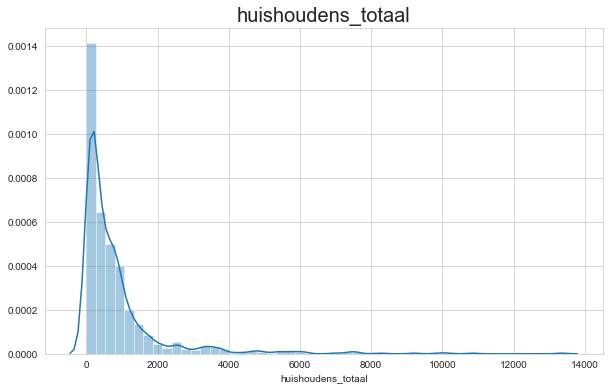

--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------
Average total electricity usage: 3420.42


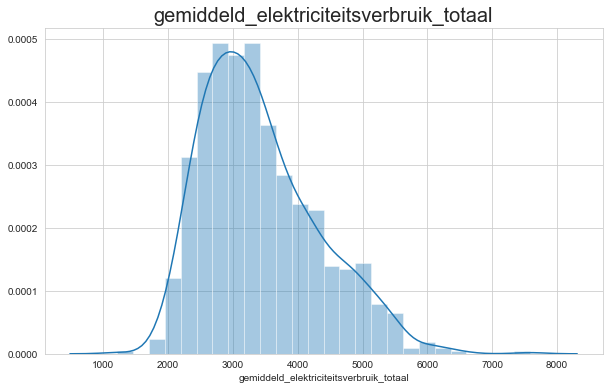

--------------------------------------------------------------------------------------------------------
Average total natural gas usage: 1624.52


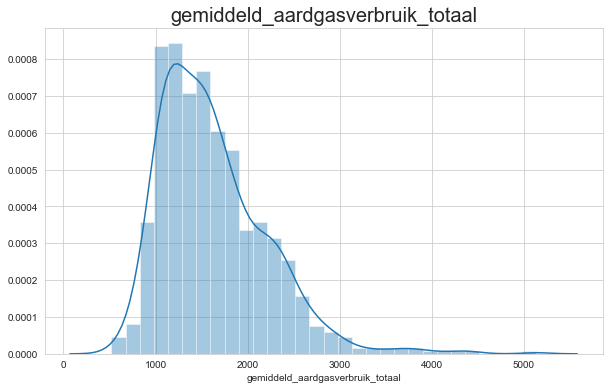

--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------
Average electricity usage per type of house


--------------------------------------------------------------------------------------------------------
Average natural gas usage per type of house


--------------------------------------------------------------------------------------------------------


--------------------------------------------------------------------------------------------------------


In [83]:
get_segmentation_characteristics(df_0)

1. Grootte van het segment: done
2. Verschil tussen man en vrouw (pie chart): done
3. Gemiddelde leeftijd (inwoners_vanaf_de_aow_leeftijd): done
5. Verdeling van type huishouden: done

7. Verdeling koopwoningen vs huurwoningen: done
8. Nieuwe vs oudere huizen: vanaf en voor 2000: done
9. gemiddeld_elektriciteitsverbruik_totaal: done
10. Gemiddelde aargas gebruik totaal: done
11. Vrijstaand, Huur of koop voor elektriciteits en aardgas verbruik om zo te kijken waar je op moet richten: huur of koop: done

Voor de laadpalen:
10. personenautos_brandstof_benzine vs personenautos_overige_brandstof ???
11. totaal_aantal_laadpalen ??? W

Voor zonnepanelen:
11. aantal_installaties_bij_woningen: done


12. Opgewekt vermogen van zonnepalen als percentage van totaal? Als dit percentage laag is, dan kansen?